In [1]:
pip install psycopg2 pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

In [4]:
import psycopg2
import pandas as pd

# Establish connection to PostgreSQL
# Connect to PostgreSQL
def connect_db():
    return psycopg2.connect(
        host="localhost",       # If using remote, replace with your remote host address
        database="IDBMS DATASETS", # Replace with your database name
        user="postgres",    # Replace with your PostgreSQL username
        password="1234"
    )


In [5]:
connection = connect_db()
# Create a cursor object to interact with PostgreSQL
cursor = connection.cursor()

In [6]:
# SQL query to select all data from your table
training_query = "SELECT * FROM train_fd001"
testing_query = "SELECT * FROM testing_fd001"
traing_rul_query = "SELECT * FROM testing_rul"

# Read the data into a pandas DataFrame
data_train = pd.read_sql(training_query, connection)
data_val = pd.read_sql(testing_query, connection)
y_val = pd.read_sql(traing_rul_query, connection)

# # Close the connection
cursor.close()
connection.close()

# Check the first few rows of the dataset
print(data_train.shape)
print(data_val.shape)
print(y_val.shape)


(20631, 26)
(13096, 26)
(100, 1)


In [7]:
df = data_train.copy()
df_val = data_val.copy()
print(df.shape , df_val.shape)

(20631, 26) (13096, 26)


In [8]:
y_val.head()

,rul
0,112
1,98
2,69
3,82
4,91


In [9]:
df.head()

,Engine,time,op_setting_1,op_setting_2,op_setting_3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [10]:
df_val.head()

,Engine,time,op_setting_1,op_setting_2,op_setting_3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [11]:
print(df.columns)
print(df_val.columns)
print(y_val.columns)

Index(['Engine', 'time', 'op_setting_1', 'op_setting_2', 'op_setting_3', 's1',
       's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12',
       's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21'],
      dtype='object')
Index(['Engine', 'time', 'op_setting_1', 'op_setting_2', 'op_setting_3', 's1',
       's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12',
       's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21'],
      dtype='object')
Index(['rul'], dtype='object')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Engine        20631 non-null  int64  
 1   time          20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   s1            20631 non-null  float64
 6   s2            20631 non-null  float64
 7   s3            20631 non-null  float64
 8   s4            20631 non-null  float64
 9   s5            20631 non-null  float64
 10  s6            20631 non-null  float64
 11  s7            20631 non-null  float64
 12  s8            20631 non-null  float64
 13  s9            20631 non-null  float64
 14  s10           20631 non-null  float64
 15  s11           20631 non-null  float64
 16  s12           20631 non-null  float64
 17  s13           20631 non-null  float64
 18  s14           20631 non-nu

In [13]:
# usefull info of dataset
df_info = pd.concat ( [data_train.isna().sum() , data_train.nunique() , data_train.dtypes] , axis = 1  )
df_info.columns = ['missing value' , 'no.of unique value' , 'dtype']
df_info

,missing value,no.of unique value,dtype
Engine,0,100,int64
time,0,362,int64
op_setting_1,0,158,float64
op_setting_2,0,13,float64
op_setting_3,0,1,float64
s1,0,1,float64
s2,0,310,float64
s3,0,3012,float64
s4,0,4051,float64
s5,0,1,float64


In [14]:
#removing constant feature means the values of the column dosent vary much and this is done 
# by calculating each column Std.deviation removing the columns thad sd<0.02

def constant_feature(df):
    constant_feature = []
    for col in df.columns:
            if abs(df[col].std() < 0.02):      # hint
                constant_feature.append(col)
    
    return constant_feature


print( constant_feature(df) )

df.drop(columns=constant_feature(df)  , inplace = True)
df_val.drop(columns=constant_feature(df) , inplace = True)

df.columns

['op_setting_1', 'op_setting_2', 'op_setting_3', 's1', 's5', 's6', 's10', 's16', 's18', 's19']


Index(['Engine', 'time', 's2', 's3', 's4', 's7', 's8', 's9', 's11', 's12',
       's13', 's14', 's15', 's17', 's20', 's21'],
      dtype='object')

In [15]:
#Creating RUL column
# RUL is remaining useful lifetime. Training dataset is data of previous engines that are degraded and data of those engines is collected from before degrading to degrading. 
# so time max is where engine data is no more and it is degraded. so we can conside that time as max time and dividing it with present time gives RUL of each engine at that time.

def create_rul(df):
    df['rul'] = df.groupby('Engine')['time'].transform('max') - df['time']
    return df
create_rul(df)

,Engine,time,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,rul
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [16]:
#Rul analysis
maxrul_u = df.groupby('Engine').max().reset_index()
maxrul_u.head(10)

,Engine,time,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,rul
0,1,192,644.21,1605.44,1432.52,554.96,2388.32,9061.21,48.33,522.86,2388.35,8140.58,8.5227,398,39.18,23.4999,191
1,2,287,643.94,1610.10,1431.17,555.45,2388.24,9109.36,48.27,523.26,2388.26,8175.57,8.5377,398,39.24,23.6005,286
2,3,179,643.93,1606.50,1438.51,555.28,2388.19,9197.52,48.38,523.18,2388.20,8255.34,8.5363,399,39.23,23.5181,178
3,4,189,644.53,1612.11,1434.12,554.75,2388.18,9203.22,48.21,522.48,2388.17,8259.42,8.5462,399,39.21,23.5074,188
4,5,269,644.02,1609.41,1434.59,555.57,2388.21,9157.05,48.27,523.04,2388.23,8215.19,8.5410,398,39.29,23.5503,268
5,6,188,644.12,1607.63,1434.92,553.99,2388.35,9051.18,48.34,522.21,2388.36,8128.37,8.5358,397,39.10,23.4517,187
6,7,259,644.27,1607.70,1436.55,555.14,2388.27,9088.71,48.35,523.00,2388.27,8158.87,8.5627,398,39.22,23.5133,258
7,8,150,644.02,1610.35,1432.31,554.04,2388.32,9053.79,48.37,522.13,2388.30,8131.45,8.5639,397,39.04,23.3798,149
8,9,201,644.04,1607.04,1433.83,555.66,2388.50,9239.76,48.11,523.12,2388.56,8289.63,8.5282,399,39.27,23.5349,200
9,10,222,644.35,1613.62,1436.29,555.42,2388.25,9115.44,48.13,523.04,2388.25,8183.55,8.5312,398,39.43,23.5493,221


In [63]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import hashlib

# Section to insert the plots into postgres Database

def create_and_save_plot(plt):
    # Save plot to a BytesIO object
    img_byte_arr = io.BytesIO()
    plt.savefig(img_byte_arr, format='png')
    img_byte_arr.seek(0)  # Go to the beginning of the BytesIO object
    plt.close()  # Close the plot after saving

    return img_byte_arr.getvalue()  # Return the binary content of the image

# Function to check if plot with a specific ID exists in the database
def plot_exists_by_id(cursor, plot_id):
    query = "SELECT id FROM plots WHERE id = %s"
    cursor.execute(query, (plot_id,))
    return cursor.fetchone() is not None


def insert_plot_to_db(plot_id,plt):
    # Insert plot binary data into the database
    plot_binary = create_and_save_plot(plt)
    plot_hash = hashlib.md5(plot_binary).hexdigest()

    conn = connect_db()
    cursor = conn.cursor()

    if plot_exists_by_id(cursor, plot_id):
        update_query = "UPDATE plots SET plot = %s, plot_hash = %s WHERE id = %s "
        cursor.execute(update_query, (psycopg2.Binary(plot_binary), plot_hash, plot_id))
        print(f"Updated plot with ID {plot_id}.")
    else:
        insert_query = "INSERT INTO plots (id, plot,plot_hash) VALUES (%s, %s,%s)"
        cursor.execute(insert_query, (plot_id, psycopg2.Binary(plot_binary),plot_hash))
        print(f"Inserted new plot with ID {plot_id}.")

    conn.commit()
    cursor.close()
    conn.close()

In [64]:
# Section to retrive and dispaly the plots into postgres Database
def retrieve_plot(cursor, plot_id):
    query = "SELECT plot FROM plots WHERE id = %s"
    cursor.execute(query, (plot_id,))
    result = cursor.fetchone()
    
    if result:
        return result[0]  # Return the binary data
    else:
        return None

def display_image_in_code(binary_data):
    if binary_data is None or len(binary_data) == 0:
        print("No binary data to display.")
        return
    
    # Convert binary data to an image
    image = Image.open(io.BytesIO(binary_data))

    # image = image.resize(640,640)
    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()


def retrive_from_pgres(id):

    conn = connect_db()
    cursor = conn.cursor()
    # Retrieve the plot by ID
    binary_data = retrieve_plot(cursor, id)

    # Display the image if it exists
    if binary_data:
        print(f"Retrieved binary data length: {len(binary_data)}")
        print("Displaying plot from database")
        display_image_in_code(binary_data)
        print("Displayed")
    else:
        print("No plot found with the specified ID.")

    conn.commit()
    cursor.close()
    conn.close()


In [65]:
df_corr = df.corr()
mask = np.tril(np.ones(df_corr.shape),k = -1).astype(bool)
df_corr = df_corr.where(mask)

Updated plot with ID corr_graph.
Retrieved binary data length: 111112
Displaying plot from database


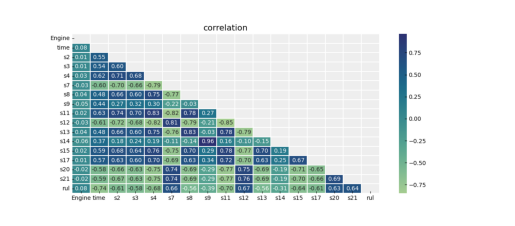

Displayed


In [66]:
plt.figure(figsize = (12,5))
plt.grid() , plt.title('correlation')
sns.heatmap(df_corr , annot=True , fmt = '0.2f' , cmap='crest' , linewidths=0.01)

insert_plot_to_db('corr_graph',plt)
retrive_from_pgres('corr_graph')

Inserted new plot with ID high_corr_graph.
Retrieved binary data length: 39118
Displaying plot from database


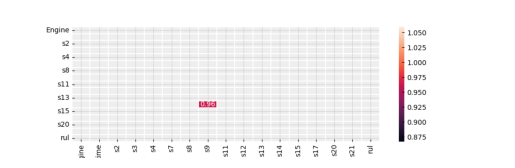

Displayed


In [21]:
# visualization high corrolated features 
plt.figure(figsize = (10,3))
mask = df_corr.where( abs(df_corr) > 0.95 ).isna()
sns.heatmap(df_corr , annot=True , fmt = '0.2f' , linewidths=0.1 , mask = mask )

insert_plot_to_db('high_corr_graph',plt)
retrive_from_pgres('high_corr_graph')

In [22]:
# detect more than 95% correlation
high_corr = []
for col in df_corr.columns:
    for row in df_corr.index:
        if abs(df_corr.loc[col , row]) > 0.95 :
            high_corr.append((col , row))
high_corr

[('s14', 's9')]

In [23]:
# these 2 feature has very high correlation , no need for both of them , we can drop one of them
# df.drop(columns = ['s9'] , inplace = True)
df.columns

Index(['Engine', 'time', 's2', 's3', 's4', 's7', 's8', 's9', 's11', 's12',
       's13', 's14', 's15', 's17', 's20', 's21', 'rul'],
      dtype='object')

Inserted new plot with ID lifetime.
Retrieved binary data length: 79310
Displaying plot from database


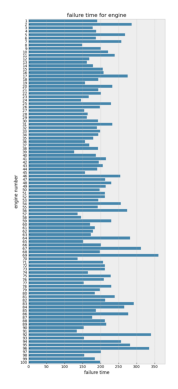

Displayed


In [24]:
# max , or failure time for each engine , or max time cycle , that engine has worked.
failure_time = df.groupby('Engine')['rul'].max()
plt.figure(figsize = (6,14))
sns.barplot(y = failure_time.index , x = failure_time.values , orient='h')
plt.title('failure time for engine')
plt.xlabel('failure time')
plt.ylabel('engine number')
plt.tight_layout()
insert_plot_to_db('lifetime',plt)
retrive_from_pgres('lifetime')
plt.show()

In [25]:
df.loc[:,['Engine','time']].describe()

,Engine,time
count,20631.000000,20631.000000
mean,51.506568,108.807862
std,29.227633,68.880990
min,1.000000,1.000000
25%,26.000000,52.000000
50%,52.000000,104.000000
75%,77.000000,156.000000
max,100.000000,362.000000


In [26]:
df.loc[:,'s2':'s21'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s2,20631.0,642.680934,0.500053,641.2100,642.3250,642.6400,643.0000,644.5300
s3,20631.0,1590.523119,6.131150,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s4,20631.0,1408.933782,9.000605,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s7,20631.0,553.367711,0.885092,549.8500,552.8100,553.4400,554.0100,556.0600
s8,20631.0,2388.096652,0.070985,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
s9,20631.0,9065.242941,22.082880,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
s11,20631.0,47.541168,0.267087,46.8500,47.3500,47.5100,47.7000,48.5300
s12,20631.0,521.413470,0.737553,518.6900,520.9600,521.4800,521.9500,523.3800
s13,20631.0,2388.096152,0.071919,2387.8800,2388.0400,2388.0900,2388.1400,2388.5600
s14,20631.0,8143.752722,19.076176,8099.9400,8133.2450,8140.5400,8148.3100,8293.7200


In [27]:
def plot_signal(df,signal_name):
    plt.figure(figsize=(13,3))
    for i in df['Engine'].unique():
        if (i % 10 == 0):   #For a better visualisation, we plot the sensors signals of 10 engines only
            plt.plot('rul', signal_name, data=df[df['Engine']==i].rolling(10).mean())

    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(signal_name)
    plt.xlabel('Remaining Useful Life')
    plot_id = f'RULvs{signal_name}'  # f-string to correctly insert signal_name into the plot_id
    insert_plot_to_db(plot_id, plt)
    retrive_from_pgres(plot_id)
    plt.show()

Inserted new plot with ID RULvss2.
Retrieved binary data length: 121765
Displaying plot from database


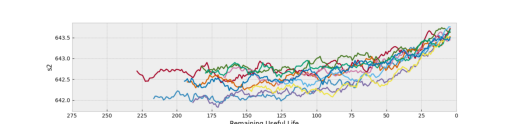

Displayed
Inserted new plot with ID RULvss3.
Retrieved binary data length: 122196
Displaying plot from database


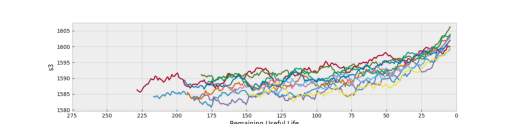

Displayed
Inserted new plot with ID RULvss4.
Retrieved binary data length: 117537
Displaying plot from database


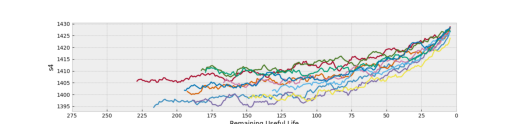

Displayed
Inserted new plot with ID RULvss7.
Retrieved binary data length: 116201
Displaying plot from database


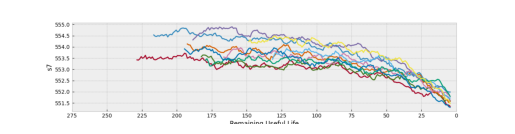

Displayed
Inserted new plot with ID RULvss8.
Retrieved binary data length: 107432
Displaying plot from database


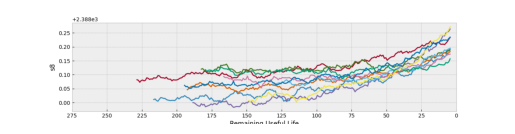

Displayed
Inserted new plot with ID RULvss9.
Retrieved binary data length: 72229
Displaying plot from database


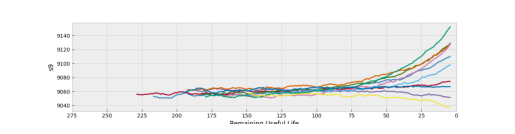

Displayed
Inserted new plot with ID RULvss11.
Retrieved binary data length: 104096
Displaying plot from database


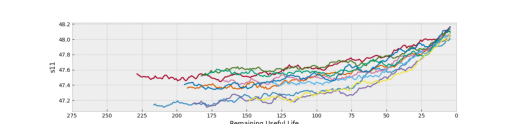

Displayed
Inserted new plot with ID RULvss12.
Retrieved binary data length: 109163
Displaying plot from database


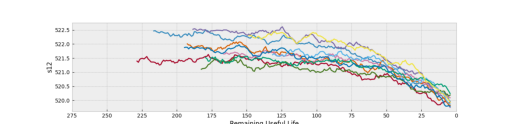

Displayed
Inserted new plot with ID RULvss13.
Retrieved binary data length: 106638
Displaying plot from database


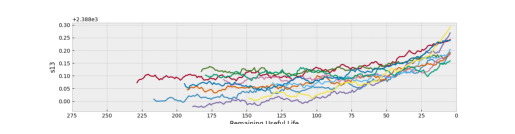

Displayed
Inserted new plot with ID RULvss14.
Retrieved binary data length: 68991
Displaying plot from database


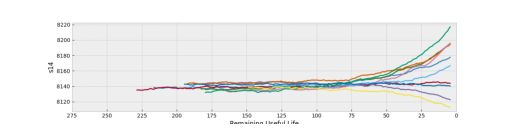

Displayed
Inserted new plot with ID RULvss15.
Retrieved binary data length: 123273
Displaying plot from database


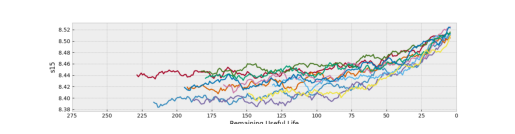

Displayed
Inserted new plot with ID RULvss17.
Retrieved binary data length: 119139
Displaying plot from database


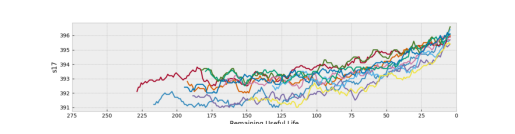

Displayed
Inserted new plot with ID RULvss20.
Retrieved binary data length: 118263
Displaying plot from database


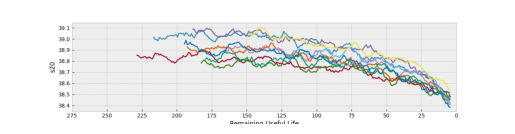

Displayed
Inserted new plot with ID RULvss21.
Retrieved binary data length: 115895
Displaying plot from database


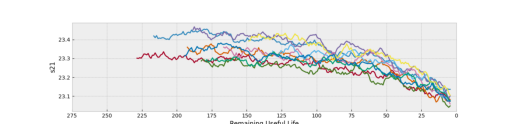

Displayed


In [28]:
for i in range(1, 22):
    column_name = 's' + str(i)
    if column_name in df.columns:
        try:
            plot_signal(df,'s'+str(i))
        except:
            pass

Updated plot with ID Histogram_s2.
Retrieved binary data length: 35227
Displaying plot from database


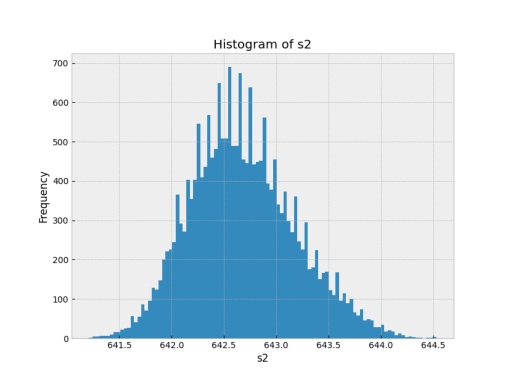

Displayed
Updated plot with ID Histogram_s3.
Retrieved binary data length: 32556
Displaying plot from database


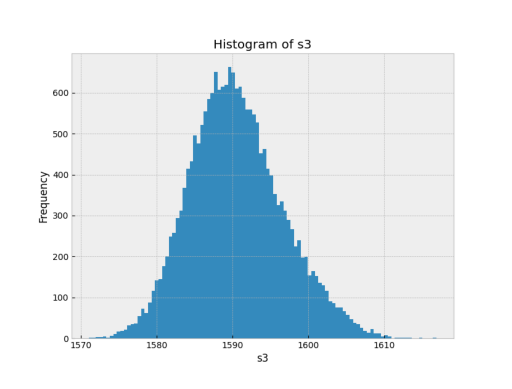

Displayed
Updated plot with ID Histogram_s4.
Retrieved binary data length: 33834
Displaying plot from database


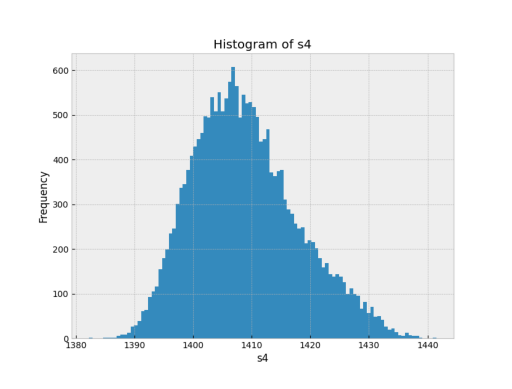

Displayed
Updated plot with ID Histogram_s7.
Retrieved binary data length: 33731
Displaying plot from database


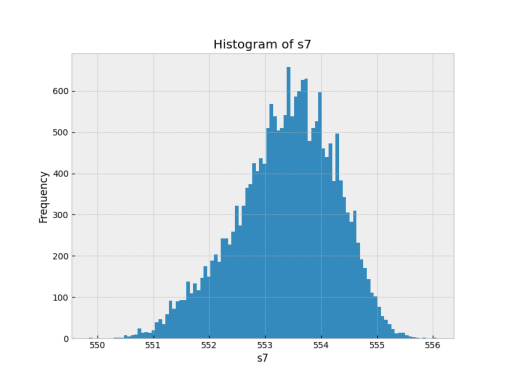

Displayed
Updated plot with ID Histogram_s8.
Retrieved binary data length: 34425
Displaying plot from database


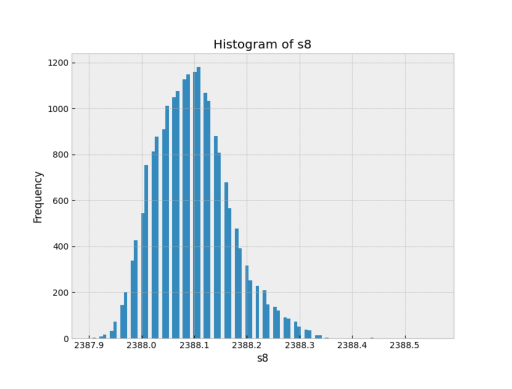

Displayed
Updated plot with ID Histogram_s9.
Retrieved binary data length: 33866
Displaying plot from database


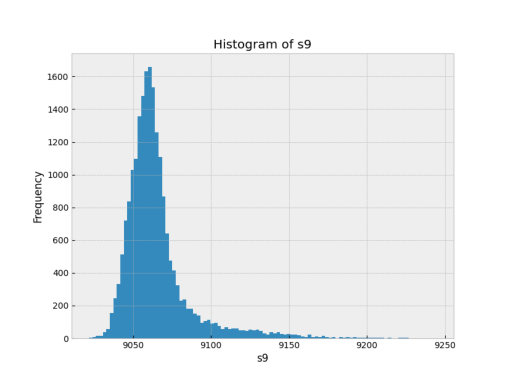

Displayed
Updated plot with ID Histogram_s11.
Retrieved binary data length: 36690
Displaying plot from database


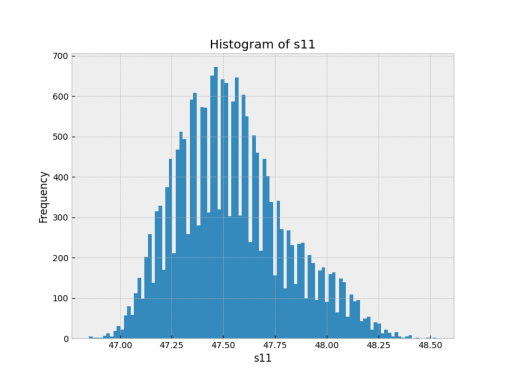

Displayed
Updated plot with ID Histogram_s12.
Retrieved binary data length: 31981
Displaying plot from database


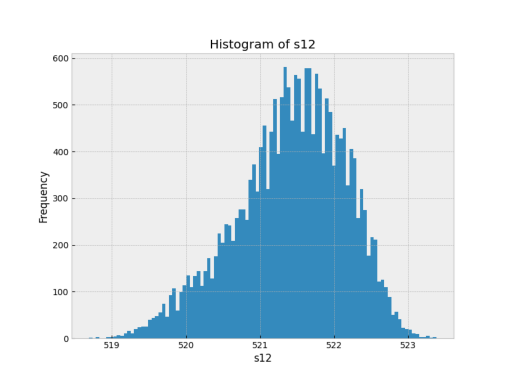

Displayed
Updated plot with ID Histogram_s13.
Retrieved binary data length: 34422
Displaying plot from database


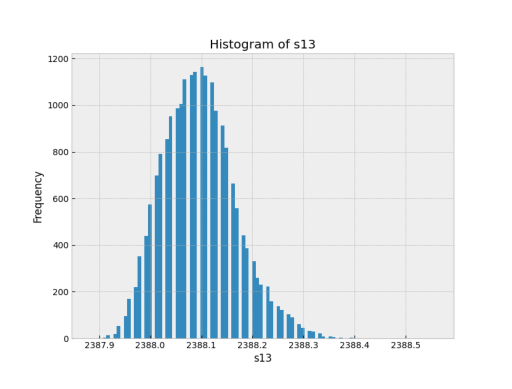

Displayed
Updated plot with ID Histogram_s14.
Retrieved binary data length: 38796
Displaying plot from database


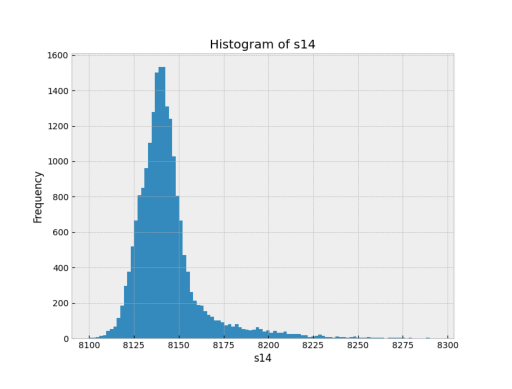

Displayed
Updated plot with ID Histogram_s15.
Retrieved binary data length: 32021
Displaying plot from database


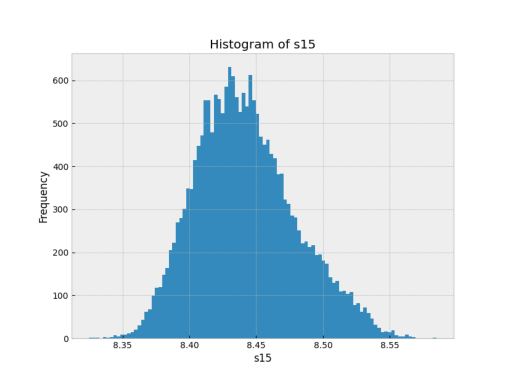

Displayed
Updated plot with ID Histogram_s17.
Retrieved binary data length: 31041
Displaying plot from database


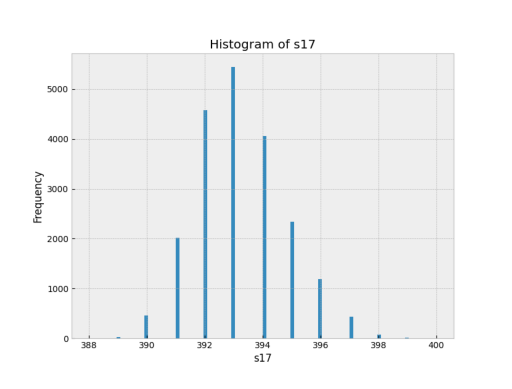

Displayed
Updated plot with ID Histogram_s20.
Retrieved binary data length: 30724
Displaying plot from database


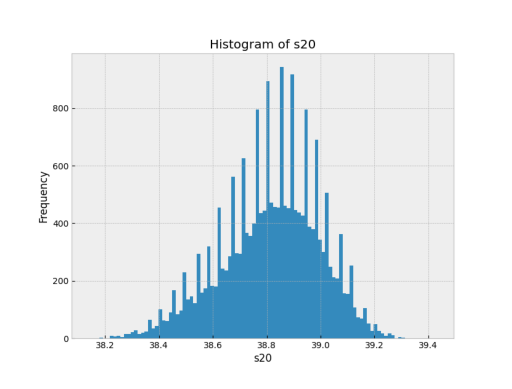

Displayed
Updated plot with ID Histogram_s21.
Retrieved binary data length: 35727
Displaying plot from database


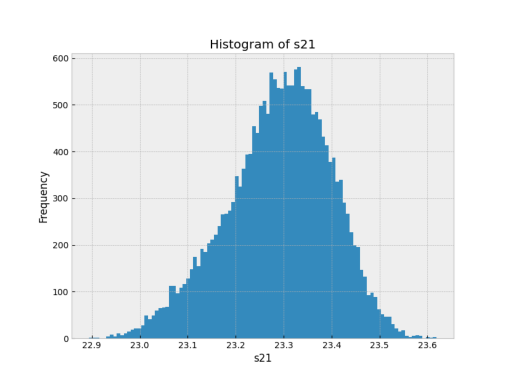

Displayed


In [29]:
# Assuming `insert_plot_to_db` and `retrive_from_pgres` are already defined as functions
# no of rows of each sensor at different value ranges.
# Define your sensor names
sensor_names = ['s{}'.format(i) for i in range(1, 22) if i not in [1, 5, 6, 10, 16, 18, 19]]

# Generate histograms for each sensor and insert them into PostgreSQL
def plot_histogram_for_each_sensor(df, sensor_names):
    for sensor in sensor_names:
        # Create a histogram for the current sensor
        plt.figure(figsize=(8, 6))  # Adjust the size of each individual plot
        df[sensor].hist(bins=100)
        
        # Set plot title and labels
        plt.title(f'Histogram of {sensor}')
        plt.xlabel(sensor)
        plt.ylabel('Frequency')
        
        # Create a unique plot ID for each sensor
        plot_id = f'Histogram_{sensor}'
        
        # Insert the plot into PostgreSQL
        insert_plot_to_db(plot_id, plt)
        
        # Optionally clear the figure after inserting to avoid overlap with future plots
        plt.clf()
        
        # Retrieve the plot from the database and display it
        retrive_from_pgres(plot_id)
        plt.show()  # Ensure the plot is shown after retrieval

# Call the function with the dataframe `df` and sensor_names
plot_histogram_for_each_sensor(df, sensor_names)


In [30]:
# sensor_names=['s{}'.format(i) for i in range(1,22) if i not in [1,5,6,10,16,18,19]]
# pd.DataFrame(df,columns=['s{}'.format(i) for i in range(1,22)])[sensor_names].hist(bins=100, figsize=(18,16))

Updated plot with ID boxplot_1.
Retrieved binary data length: 19345
Displaying plot from database


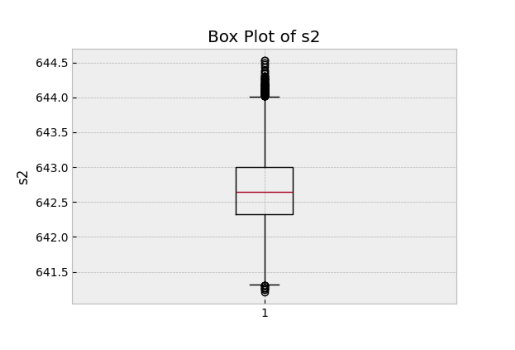

Displayed
Updated plot with ID boxplot_2.
Retrieved binary data length: 16554
Displaying plot from database


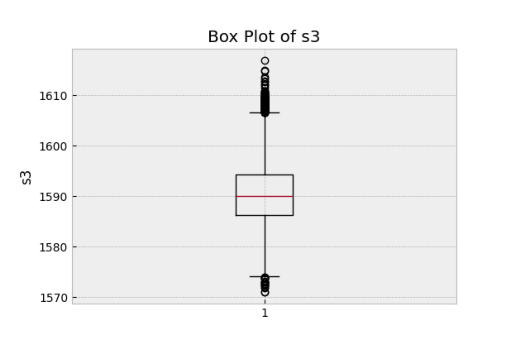

Displayed
Updated plot with ID boxplot_3.
Retrieved binary data length: 18354
Displaying plot from database


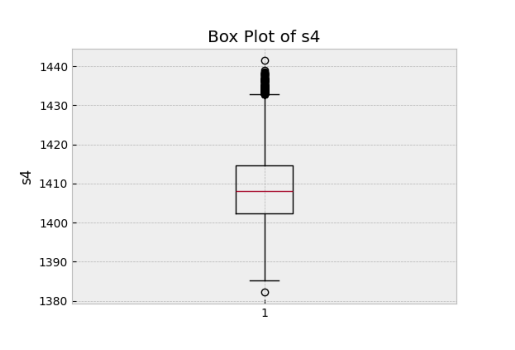

Displayed
Updated plot with ID boxplot_4.
Retrieved binary data length: 17318
Displaying plot from database


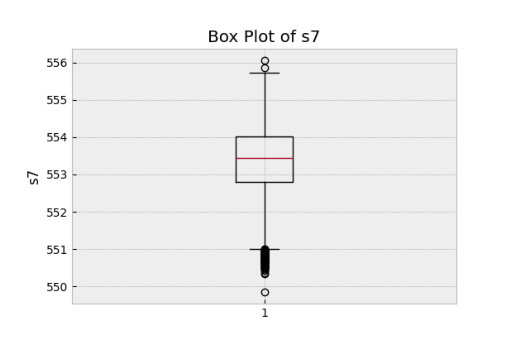

Displayed
Updated plot with ID boxplot_5.
Retrieved binary data length: 22993
Displaying plot from database


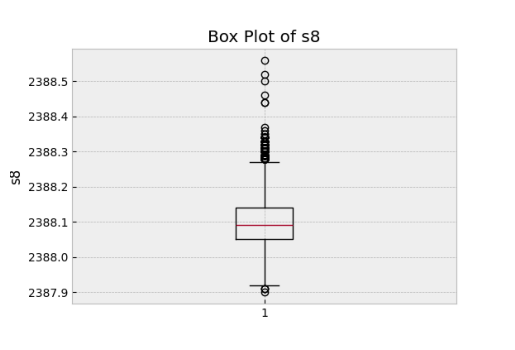

Displayed
Updated plot with ID boxplot_6.
Retrieved binary data length: 17174
Displaying plot from database


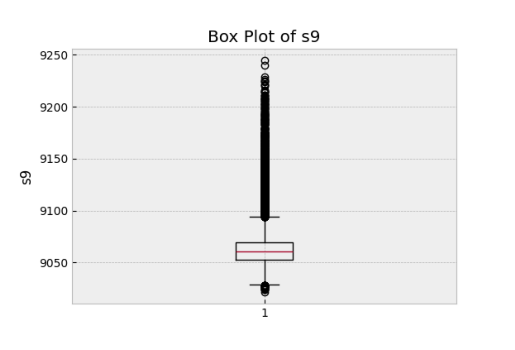

Displayed
Updated plot with ID boxplot_7.
Retrieved binary data length: 18787
Displaying plot from database


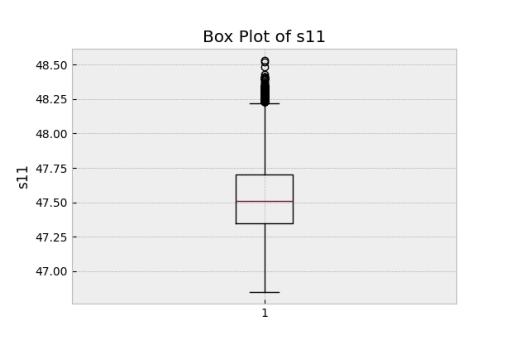

Displayed
Updated plot with ID boxplot_8.
Retrieved binary data length: 14874
Displaying plot from database


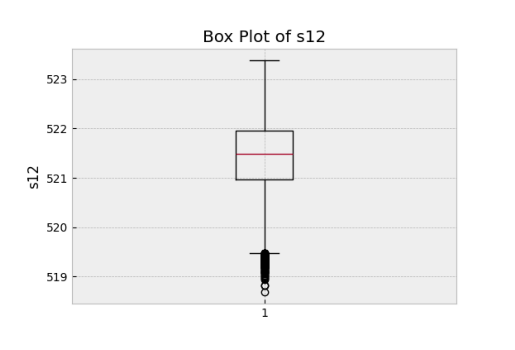

Displayed
Updated plot with ID boxplot_9.
Retrieved binary data length: 23205
Displaying plot from database


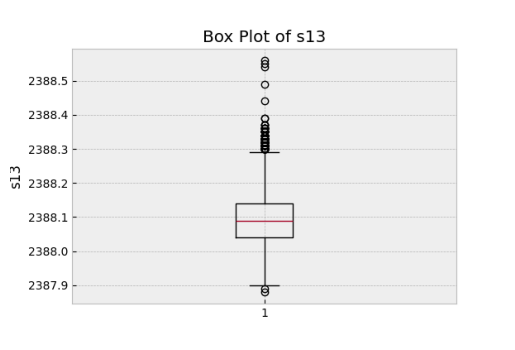

Displayed
Updated plot with ID boxplot_10.
Retrieved binary data length: 22929
Displaying plot from database


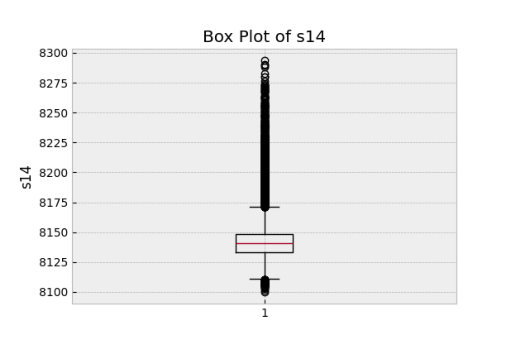

Displayed
Updated plot with ID boxplot_11.
Retrieved binary data length: 15946
Displaying plot from database


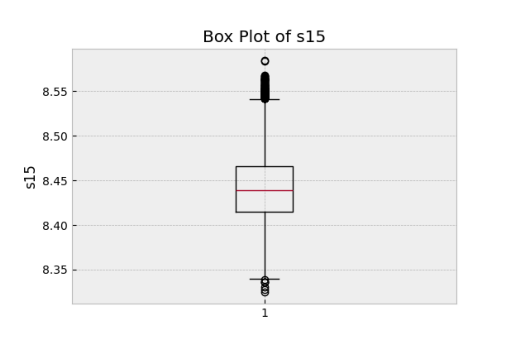

Displayed
Updated plot with ID boxplot_12.
Retrieved binary data length: 18365
Displaying plot from database


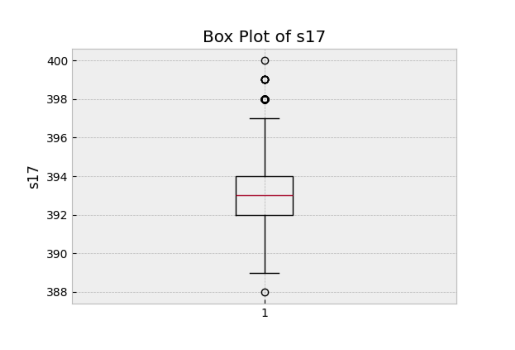

Displayed
Updated plot with ID boxplot_13.
Retrieved binary data length: 19439
Displaying plot from database


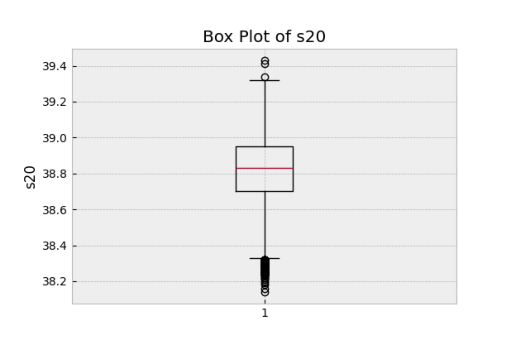

Displayed
Updated plot with ID boxplot_14.
Retrieved binary data length: 19764
Displaying plot from database


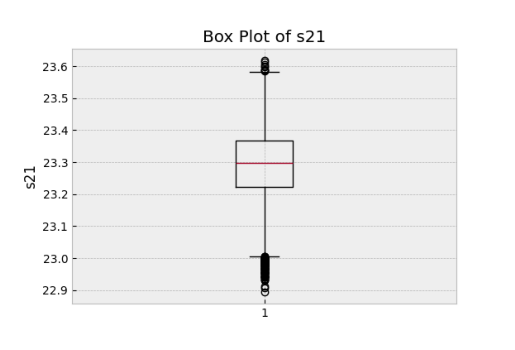

Displayed


In [31]:
import matplotlib.pyplot as plt

# Assuming insert_plot_to_db and retrive_from_pgres are already defined as functions

# Define your sensor names
sensor_names = ['s{}'.format(i) for i in range(1, 22) if i not in [1, 5, 6, 10, 16, 18, 19]]

# Generate and insert box plots for each sensor
def plot_boxplot_for_each_sensor(df, sensor_names):
    for i, sensor in enumerate(sensor_names):
        # Create a new figure for each sensor
        plt.figure(figsize=(6, 4))
        
        # Create box plot for the current sensor
        plt.boxplot(df[sensor])
        
        # Set title and labels
        plt.title(f'Box Plot of {sensor}')
        plt.ylabel(sensor)
        
        # Create a unique plot ID for each box plot
        plot_id = f'boxplot_{i+1}'  # Unique name, where i+1 corresponds to the sensor number
        
        # Insert the plot into PostgreSQL
        insert_plot_to_db(plot_id, plt)
        
        # Optionally clear the figure after inserting to avoid overlap with future plots
        plt.clf()
        
        # Retrieve the plot from PostgreSQL and display it
        retrive_from_pgres(plot_id)
        plt.show()  # Ensure the plot is shown after retrieval

# Call the function to generate and store box plots
plot_boxplot_for_each_sensor(df, sensor_names)


In [32]:
# import matplotlib.pyplot as plt

# # Create a grid with 4 columns and enough rows
# fig, axes = plt.subplots(nrows=(len(sensor_names) + 3) // 4, ncols=4, figsize=(15, 20))

# # Flatten axes for easier access
# axes = axes.flatten()

# for i, x in enumerate(sensor_names):
#     axes[i].boxplot(df[x])
#     axes[i].set_title(x)

# # Hide any unused subplots
# for i in range(len(sensor_names), len(axes)):
#     axes[i].axis('off')

# plt.tight_layout()
# plt.show()


In [33]:
print(df.columns)
features = df.columns[2:-1]   # drop  engine , time , rul of  dataset
# features = df.columns.drop(['time', 'rul'])   # drop  time , rul of  dataset
features

Index(['Engine', 'time', 's2', 's3', 's4', 's7', 's8', 's9', 's11', 's12',
       's13', 's14', 's15', 's17', 's20', 's21', 'rul'],
      dtype='object')


Index(['s2', 's3', 's4', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15',
       's17', 's20', 's21'],
      dtype='object')

In [34]:
from sklearn.model_selection import train_test_split
X = df[features]
y = df['rul']

X_train , X_test , y_train , y_test  = train_test_split(X, y, test_size=0.3 , random_state=42)

In [35]:
X_train.columns

Index(['s2', 's3', 's4', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15',
       's17', 's20', 's21'],
      dtype='object')

In [36]:
# validation set 
X_val = df_val.groupby('Engine').last().reset_index()    # take last row per engine , shows max time
X_val = X_val[features]   # no need for time in val set too

X_val.shape

(100, 14)

In [37]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()

Trainer = X_train.copy()
Validator = X_val.copy()
Tester = X_test.copy()

#Scaling X_train and X_test
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)
X_val_s=scaler.fit_transform(X_val)

In [38]:
X_train.shape , X_test.shape , X_val.shape, y_train.shape , y_test.shape , y_val.shape

((14441, 14), (6190, 14), (100, 14), (14441,), (6190,), (100, 1))

In [39]:
#R2 score & RMSE & MAER
from sklearn.metrics import mean_squared_error, r2_score
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [40]:
# #RandomForestRegressor

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import ShuffleSplit
# from sklearn.ensemble import RandomForestRegressor

# estimator = RandomForestRegressor()
# param_grid = {
#     'n_estimators': [90,95,96,97,98,99,100],
#     'max_depth' : [7,8,9,10,11],
# }

# grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

# grid.fit(X_train_s, y_train)

# print(grid.best_score_ , grid.best_params_)
# # #max_features=5,


In [41]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from scipy.stats import randint

# # Define hyperparameter distribution
# param_dist = {'n_estimators': randint(90, 101),     # no. of decision trees
#               'max_depth': randint(6, 13),          # max depth of each tree
#               # 'min_samples_split': randint(2, 10),  # min samples required to split a node
#               # 'min_samples_leaf': randint(1, 5)    # min samples required at a leaf node
#              }

# # Create a random forest classifier
# rf = RandomForestClassifier()

# # Use random search to find the best hyperparameters
# rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5)

# # Fit the model to find the best hyperparameters
# rand_search.fit(X_train_s, y_train)

# print(rand_search.best_score_ , rand_search.best_params_)

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=92,  max_depth=10, random_state=42)
rf.fit(X_train_s, y_train)


RandomForestRegressor(max_depth=10, n_estimators=92, random_state=42)

In [43]:
# predict and evaluate
y_hat_train = rf.predict(X_train_s)
evaluate(y_train,y_hat_train, label='train')
y_hat_test = rf.predict(X_test_s)
evaluate(y_test, y_hat_test, label='test')
y_hat_val = rf.predict(X_val_s)
evaluate(y_val, y_hat_val, label='validation')

train set RMSE:35.16632948614517, R2:0.7431096642153521
test set RMSE:44.12656588130911, R2:0.5748920308865106
validation set RMSE:34.71842366576878, R2:0.30199191540819625


In [44]:
#plot real data and the predicted one to make some comparison
def plot_predActual(y_test, y_test_hat):

    indices = np.arange(len(y_test_hat))
    wth= 0.6
    plt.figure(figsize=(250,70))
    true_values = [int(x) for x in y_test.values]
    predicted_values = list(y_test_hat)

    plt.bar(indices, true_values, width=wth,color='b', label='True RUL')
    plt.bar([i for i in indices], predicted_values, width=0.5*wth, color='r', alpha=0.7, label='Predicted RUL')

    plt.legend(prop={'size': 40})
    plt.tick_params(labelsize=40)
    insert_plot_to_db('RFprediction', plt)
    retrive_from_pgres('RFprediction')
    plt.show()

Updated plot with ID RFprediction.
Retrieved binary data length: 892311
Displaying plot from database


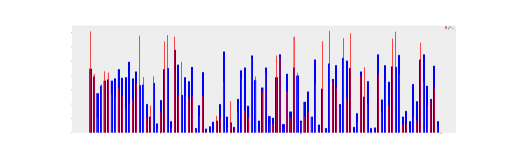

Displayed


In [45]:
plot_predActual(y_val, y_hat_val)

In [46]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.svm import SVR

# # Define hyperparameter distribution
# params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
#                     {'kernel': ['poly'], 'degree': [2, 3, 4, 5], 'C': [1, 10, 100, 1000]}]

# # Create a random forest classifier
# svr = SVR()


# # Create a random forest classifier
# svr_model = RandomizedSearchCV(svr, params_grid, cv=5)
# svr_model.fit(X_train_s, y_train)

# # Fit the model to find the best hyperparameters
# svr_model.fit(X_train_s, y_train)

# print(rand_search.best_score_ , rand_search.best_params_)

In [47]:
#SVR

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_s, y_train)


SVR()

In [48]:
# predict and evaluate
y_hat_train = regressor.predict(X_train_s)
evaluate(y_train,y_hat_train, label='train')
y_hat_test = regressor.predict(X_test_s)
evaluate(y_test, y_hat_test, label='test')
y_hat_val = regressor.predict(X_val_s)
evaluate(y_val, y_hat_val, label='valid')

train set RMSE:42.54724224579233, R2:0.6239578590036827
test set RMSE:48.75516379159361, R2:0.48103242301470384
valid set RMSE:25.947912225366203, R2:0.6101071274546097


In [49]:
#plot real data and the predicted one to make some comparison
def plot_predActual(y_test, y_test_hat):

    indices = np.arange(len(y_test_hat))
    wth= 0.6
    plt.figure(figsize=(70,30))
    true_values = [int(x) for x in y_test.values]
    predicted_values = list(y_test_hat)

    plt.bar(indices, true_values, width=wth,color='b', label='True RUL')
    plt.bar([i for i in indices], predicted_values, width=0.5*wth, color='r', alpha=0.7, label='Predicted RUL')

    plt.legend(prop={'size': 40})
    plt.tick_params(labelsize=40)
    insert_plot_to_db('SVRprediction', plt)
    retrive_from_pgres('SVRprediction')
    plt.show()


Updated plot with ID SVRprediction.
Retrieved binary data length: 216807
Displaying plot from database


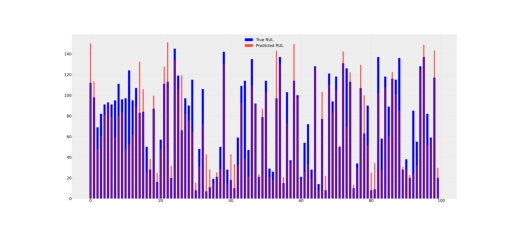

Displayed


In [50]:
plot_predActual(y_val, y_hat_val)

In [51]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train_s,y_train)



LinearRegression()

In [52]:
# predict and evaluate
y_hat_train = model.predict(X_train_s)
evaluate(y_train,y_hat_train, label='train')
y_hat_test = model.predict(X_test_s)
evaluate(y_test, y_hat_test, label='test')
y_hat_val = model.predict(X_val_s)
evaluate(y_val, y_hat_val, label='valid')

train set RMSE:44.803728035551984, R2:0.5830135052284944
test set RMSE:46.11402576435105, R2:0.5357359432947801
valid set RMSE:43.058778868851654, R2:-0.07365283266128841


In [53]:
#plot real data and the predicted one to make some comparison
def plot_predActual(y_test, y_test_hat):

    indices = np.arange(len(y_test_hat))
    wth= 0.6
    plt.figure(figsize=(70,30))
    true_values = [int(x) for x in y_test.values]
    predicted_values = list(y_test_hat)

    plt.bar(indices, true_values, width=wth,color='b', label='True RUL')
    plt.bar([i for i in indices], predicted_values, width=0.5*wth, color='r', alpha=0.7, label='Predicted RUL')

    plt.legend(prop={'size': 40})
    plt.tick_params(labelsize=40)
    insert_plot_to_db('linearprediction', plt)
    retrive_from_pgres('linearprediction')
    plt.show()

Updated plot with ID linearprediction.
Retrieved binary data length: 202302
Displaying plot from database


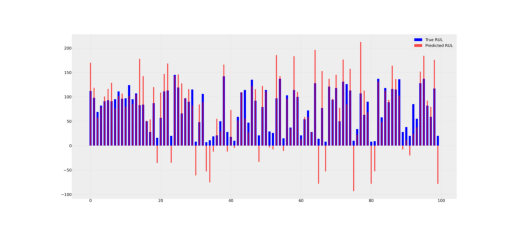

Displayed


In [54]:
plot_predActual(y_val, y_hat_val)

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=200,  max_depth=10, n_jobs=-1, random_state=42)
rf.fit(X_train_s, y_train)


RandomForestRegressor(max_depth=10, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [56]:
# predict and evaluate
y_hat_train = rf.predict(X_train_s)
evaluate(y_train,y_hat_train, label='train')
y_hat_test = rf.predict(X_test_s)
evaluate(y_test, y_hat_test, label='test')
y_hat_val = rf.predict(X_val_s)
evaluate(y_val, y_hat_val, label='valid')

train set RMSE:35.12368002255697, R2:0.7437323957521326
test set RMSE:44.02466847795289, R2:0.5768530891697001
valid set RMSE:34.88514977312012, R2:0.29527181745916253


Updated plot with ID FeatureImportance.
Retrieved binary data length: 27813
Displaying plot from database


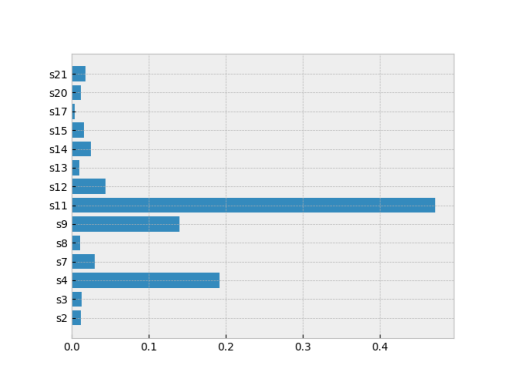

Displayed


In [57]:
#BEST FEATURE FOR RANDOM FOREST i.e., RF MODEL
rf.fit(X_train, y_train)
plt.barh(X_train.columns, rf.feature_importances_)
insert_plot_to_db('FeatureImportance', plt)
retrive_from_pgres('FeatureImportance')

In [58]:
### Creating new df for rf
Train_rf = X_train.copy()
Test_rf = X_test.copy()
Valid_rf = X_val.copy()

Train_rf.drop(columns=['s2','s3','s8','s13','s15','s17','s20','s21'], inplace=True)
Test_rf.drop(columns=['s2','s3','s8','s13','s15','s17','s20','s21'], inplace=True)
Valid_rf.drop(columns=['s2','s3','s8','s13','s15','s17','s20','s21'], inplace=True)

Train_rf_s=scaler.fit_transform(Train_rf)
Test_rf_s=scaler.fit_transform(Test_rf)
Valid_rf_s=scaler.fit_transform(Valid_rf)

from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(Train_rf_s, y_train)

# predict and evaluate
y_hat_train = regressor.predict(Train_rf_s)
evaluate(y_train,y_hat_train, label='train')
y_hat_test = regressor.predict(Test_rf_s)
evaluate(y_test, y_hat_test, label='test')
y_hat_val = regressor.predict(Valid_rf_s)
evaluate(y_val, y_hat_val, label='valid')

train set RMSE:42.89047103362217, R2:0.6178663203086113
test set RMSE:46.21320988479231, R2:0.5337366755231652
valid set RMSE:29.107580552462533, R2:0.509371613457035


Displaying plot from database


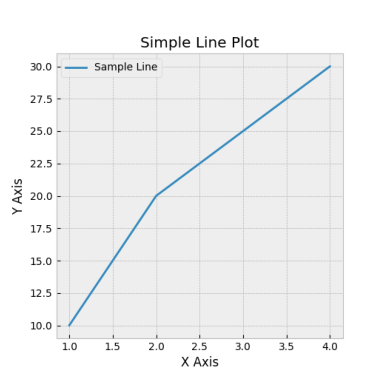

Displayed


In [59]:
import psycopg2
from PIL import Image
import io
import matplotlib.pyplot as plt

def connect_db():
    # Adjust your connection details here
    return psycopg2.connect(database="IDBMS DATASETS", user="postgres", password="1234", host="localhost")

def insert_plot_to_db(cursor, plot_id, plot_binary):
    # Insert plot binary data into the database
    query = "INSERT INTO plots (id, plot) VALUES (%s, %s)"
    cursor.execute(query, (plot_id, psycopg2.Binary(plot_binary)))

def create_and_save_plot():
    # Create a simple plot
    plt.figure(figsize=(5,5))
    plt.plot([1, 2, 3, 4], [10, 20, 25, 30], label="Sample Line")
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title('Simple Line Plot')
    plt.legend()

    # Save plot to a BytesIO object
    img_byte_arr = io.BytesIO()
    plt.savefig(img_byte_arr, format='png')
    img_byte_arr.seek(0)  # Go to the beginning of the BytesIO object
    plt.close()  # Close the plot after saving

    return img_byte_arr.getvalue()  # Return the binary content of the image

def retrieve_plot(cursor, plot_id):
    query = "SELECT plot FROM plots WHERE id = %s"
    cursor.execute(query, (plot_id,))
    result = cursor.fetchone()
    
    if result:
        return result[0]  # Return the binary data
    else:
        return None

def display_image_in_code(binary_data):
    if binary_data is None or len(binary_data) == 0:
        print("No binary data to display.")
        return
    
    # Convert binary data to an image
    image = Image.open(io.BytesIO(binary_data))
    
    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

# Connect to the database
conn = connect_db()
cursor = conn.cursor()

# Create a plot and save its binary content
plot_binary = create_and_save_plot()

# Insert the plot into the database with id 'eg'
insert_plot_to_db(cursor, 'eg', plot_binary)

# Commit the transaction after inserting the plot
conn.commit()

# Retrieve the binary data for the plot with id 'eg'
binary_data = retrieve_plot(cursor, 'eg')

# Display the image
if binary_data:
    print("Displaying plot from database")
    display_image_in_code(binary_data)
    print("Displayed")
else:
    print("No plot found with the specified ID.")

# Close connection
cursor.close()
conn.close()
